# Test Of Tobias Reading "The deadliest virus in modern history..."

In [99]:
from idt_algo import IDT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 

In [100]:
gaze = pd.read_csv("C:/Users/s224182/Desktop/Fagpakkeprojekt-Eyes-Modelling/data/gaze_data71.csv")

In [101]:
warnings.filterwarnings('ignore') 
t = gaze['device_time_stamp']
start = t[0]
for i in range(len(t)):
    t[i] = (t[i] - start)/(467000*2)
t

0        0.000000
1        0.011888
2        0.023775
3        0.035663
4        0.047550
          ...    
4614    54.849912
4615    54.861801
4616    54.873688
4617    54.885576
4618    54.897464
Name: device_time_stamp, Length: 4619, dtype: float64

In [102]:
left_x = gaze['left_gaze_point_on_display_area_x']
left_y = gaze['left_gaze_point_on_display_area_y']
right_x = gaze['right_gaze_point_on_display_area_x']
right_y = gaze['right_gaze_point_on_display_area_y']

eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y})
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,0.358848,0.358860,0.841732,0.825539
1,0.011888,0.357422,0.357587,0.843446,0.829207
2,0.023775,0.357644,0.356963,0.844360,0.828756
3,0.035663,0.356814,0.359036,0.841936,0.832000
4,0.047550,0.358711,0.361033,0.839189,0.831032
...,...,...,...,...,...
4614,54.849912,0.674075,0.670307,0.886201,0.845749
4615,54.861801,0.673145,0.670699,0.884560,0.842930
4616,54.873688,0.676026,0.673135,0.881087,0.839421
4617,54.885576,0.677953,0.671457,0.884783,0.842678


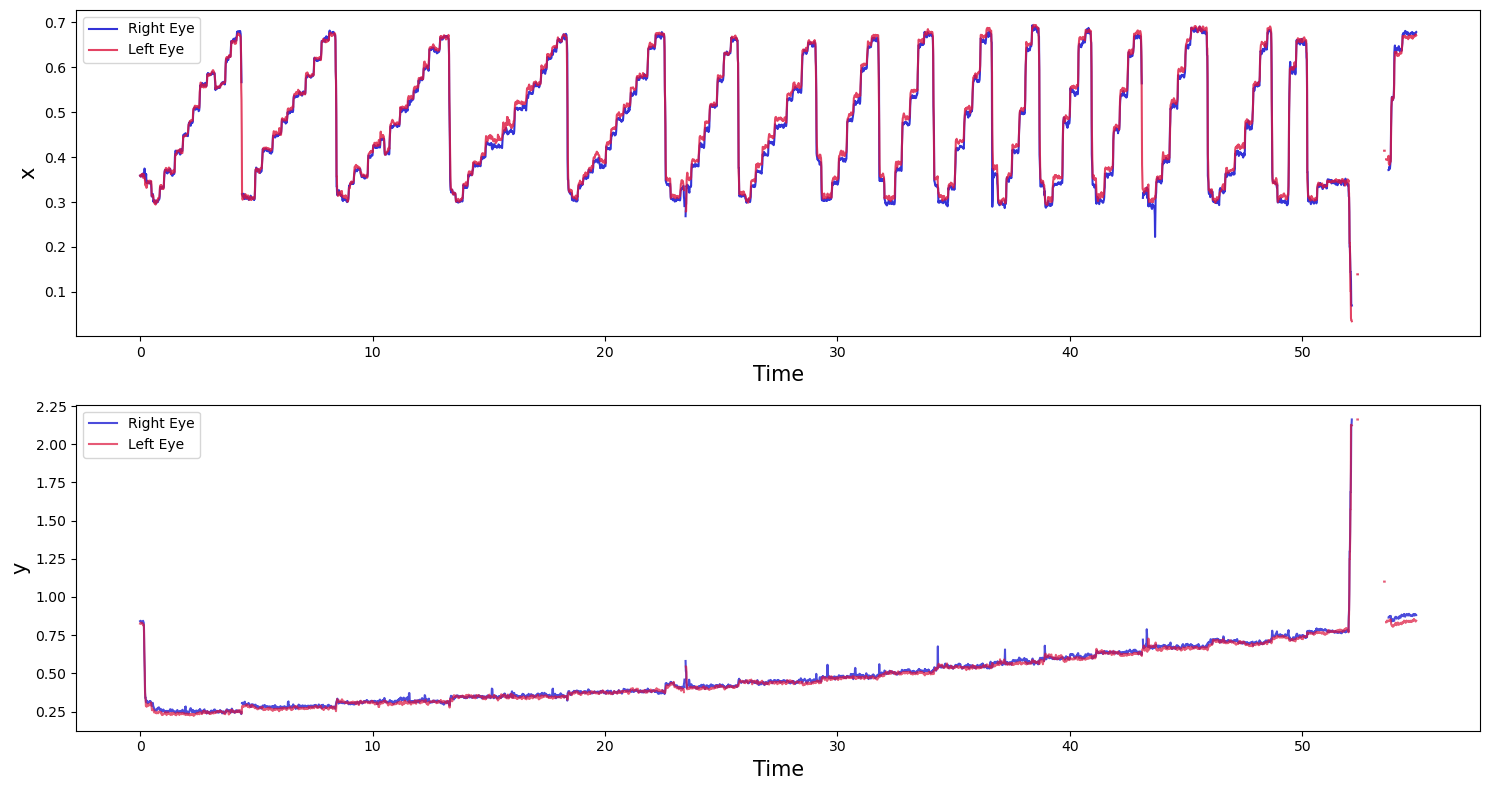

In [103]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

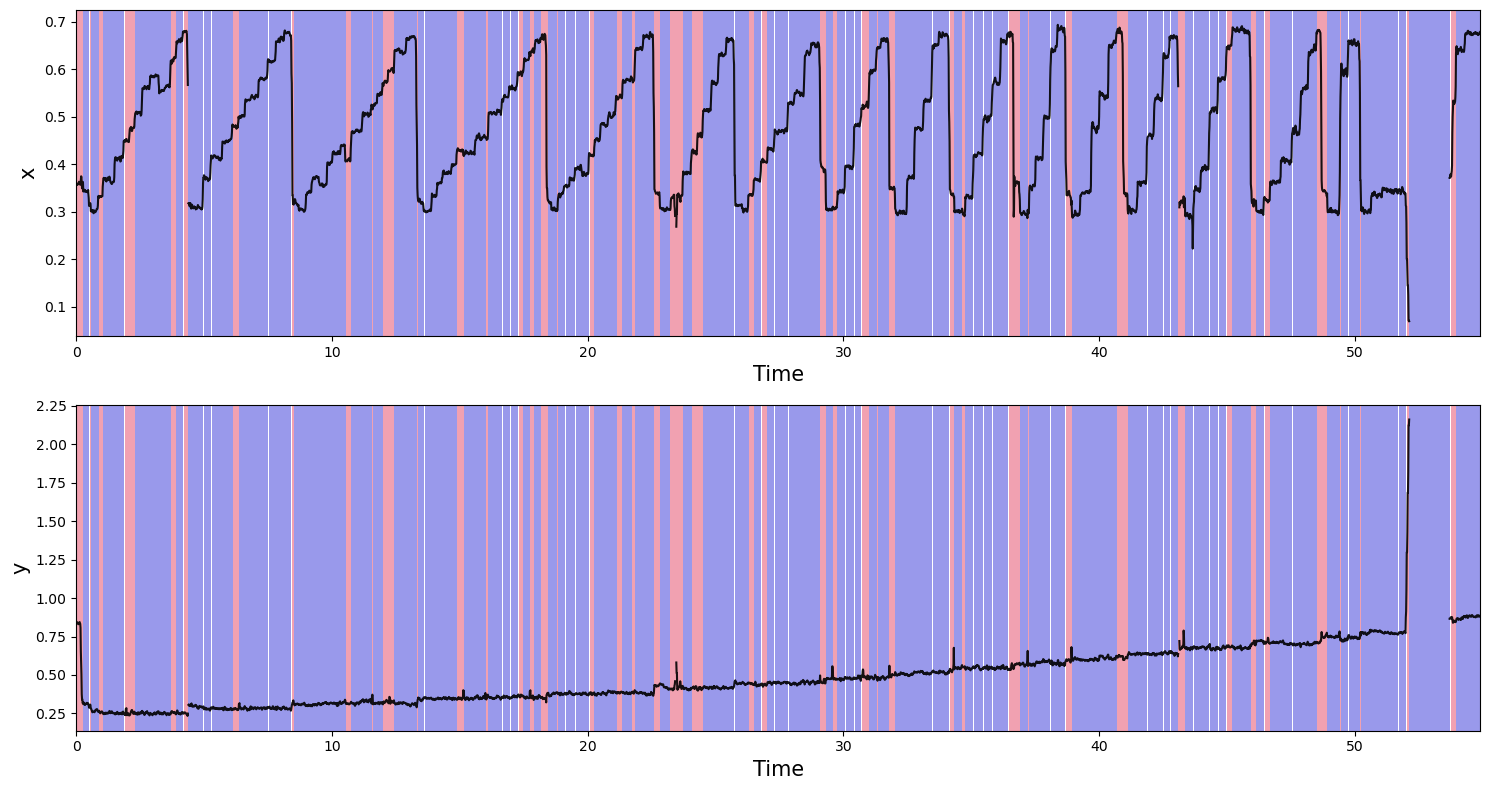

In [104]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IDT(t, x, y, threshold=0.05, window_size=20)
classifier.process()
classifier.plot()

In [105]:
fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
eyes = eyes.merge(fix, left_index=True, right_index=True)


In [106]:
eyes_filtered = eyes[(eyes['t'] >= 2) & (eyes['t'] <= 50)]
eyes_filtered.reset_index(drop=True, inplace=True)

In [118]:
counter = 0
si = 0
xpoints = []
ypoints = []
for i in range(len(eyes_filtered)):
    if eyes['fixations'][i] == 1:
        counter += 1
    if eyes['fixations'][i] == 0:
        si += 1
    elif eyes_filtered['fixations'][i] == 1 and counter > 5 and si > 3:
        xpoints.append(eyes_filtered['x_left'][i])
        ypoints.append(eyes_filtered['y_left'][i])
        counter = 0
        si = 0
   

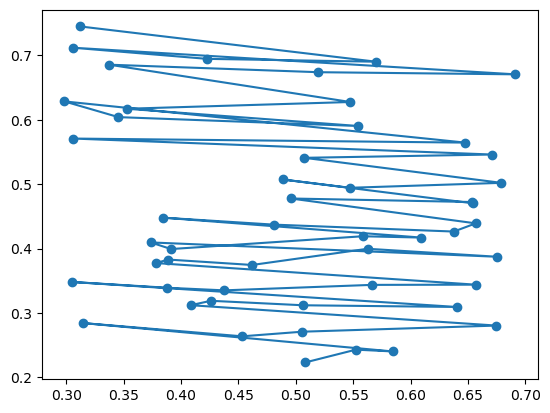

In [120]:
plt.plot(xpoints, ypoints, marker='o')
plt.show()
